In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv as csv
from matplotlib.gridspec import GridSpec
from scipy import stats
import scipy.stats
from scipy.stats import norm
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split


In [504]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
#red_wine = pd.read_csv("winequality-red.csv", sep=";")
red_wine.head(10)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [505]:
red_wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [506]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [507]:
red_wine.isnull().any(axis=0)   #Missing values?
#red_wine.isnull().values.any()
#red_wine.isnull().sum()         # total count of missing values


fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [508]:
red_wine_stat = red_wine.describe() #check for Descriptive Statistics for both red and white wine datasets
red_wine_stat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [509]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

Red_Quality = pd.DataFrame(red_wine['quality_label'].value_counts().sort_index())
Red_Quality

,quality_label
low,744
medium,837
high,18


In [510]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [511]:
white_wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [512]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [513]:
white_wine.isnull().any(axis=0)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [514]:
white_wine_stat = white_wine.describe()
white_wine_stat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [515]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

White_Quality = pd.DataFrame(white_wine['quality_label'].value_counts().sort_index())
White_Quality

,quality_label
low,1640
medium,3078
high,180


In [516]:
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)


In [517]:
#red_wine_comp = red_wine_stat.drop(columns=["fixed acidity","sulphates","citric acid","chlorides","free sulfur dioxide","density","pH"], axis=1).style.set_table_attributes("style='display:inline'").set_caption('Red Wine Statistics')
#white_wine_comp = white_wine_stat.drop(columns=["fixed acidity","sulphates","citric acid","chlorides","free sulfur dioxide","density","pH"], axis=1).style.set_table_attributes("style='display:inline'").set_caption('White Wine Statistics')
#white_wine_comp

red_wine_comp = red_wine_stat.drop(columns=["fixed acidity","sulphates","citric acid","chlorides","free sulfur dioxide","density","pH"],  axis=1,)
white_wine_comp = white_wine_stat.drop(columns=["fixed acidity","sulphates","citric acid","chlorides","free sulfur dioxide","density","pH"], axis=1)

wine_comp = pd.concat([red_wine_comp,white_wine_comp] ,axis=1, keys= ("Red Wine Statistics","White Wine Statistics"))
wine_comp


#red_wine_styler = red_wine.tail(10).style.\
#set_table_attributes ("style='display:inline'").\
#set_caption('Red Wine Statistics')

#white_wine_styler = white_wine.tail(10).style.\
#set_table_attributes ("style='display:inline'").\
#set_caption('White Wine Statistic')

#display_html(red_wine_styler._repr_html_()+white_wine_styler._repr_html_(), raw=True)


Red Wine Statistics                                                   \
         volatile acidity residual sugar total sulfur dioxide      alcohol   
count         1599.000000    1599.000000          1599.000000  1599.000000   
mean             0.527821       2.538806            46.467792    10.422983   
std              0.179060       1.409928            32.895324     1.065668   
min              0.120000       0.900000             6.000000     8.400000   
25%              0.390000       1.900000            22.000000     9.500000   
50%              0.520000       2.200000            38.000000    10.200000   
75%              0.640000       2.600000            62.000000    11.100000   
max              1.580000      15.500000           289.000000    14.900000   

                   White Wine Statistics                                      \
           quality      volatile acidity residual sugar total sulfur dioxide   
count  1599.000000           4898.000000    4898.000000          4898.000000   
mean      5.636023              0.278241       6.391415           138.360657   
std       0.807569              0.100795       5.072058            42.498065   
min       3.000000              0.080000       0.600000             9.000000   
25%       5.000000              0.210000       1.700000           108.000000   
50%       6.000000              0.260000       5.200000           134.000000   
75%       6.000000              0.320000       9.900000           167.000000   
max       8.000000              1.100000      65.800000           440.000000   

                                 
           alcohol      quality  
count  4898.000000  4898.000000  
mean     10.514267     5.877909  
std       1.230621     0.885639  
min       8.000000     3.000000  
25%       9.500000     5.000000  
50%      10.400000     6.000000  
75%      11.400000     6.000000  
max      14.200000     9.000000

In [518]:
# fixed acidity: mean value red is higher than white, std from red is significant higher than white(more than double) -> min,max from red is higher than white
# volatile acidity: mean value red is higher than white                  

In [519]:
#red_wine.describe().loc[['count']]
white_wine_stat.loc["count","fixed acidity"]


4898.0

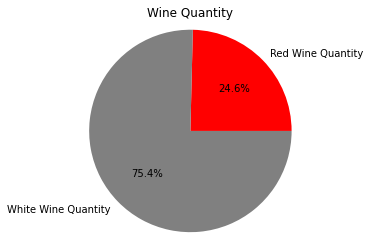

In [520]:
red_wine_count = [1599]
white_wine_count= [4898]


#red_wine_count = red_wine_stat.loc["count","fixed acidity"]
#white_wine_count = white_wine_stat.loc["count","fixed acidity"]

labels = "Red Wine Quantity", "White Wine Quantity"
colors = ["Red","Gray"]

plt.figure(figsize=(4,4))
plt.pie(red_wine_count + white_wine_count,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Wine Quantity')
plt.axis('equal')
plt.show()

In [521]:
data_white = {'Quality Label': ['Low', 'Medium', 'High'],
        'Count': [1640, 3078, 180]}
  
# Create DataFrame
df_white = pd.DataFrame(data_white)
  
# Print the output.
df_white

,Quality Label,Count
0,Low,1640
1,Medium,3078
2,High,180


In [522]:
data_red = {'Quality Label': ['Low', 'Medium', 'High'],
        'Count': [744, 837, 18]}
  
# Create DataFrame
df_red = pd.DataFrame(data_red)
  
# Print the output.
df_red

,Quality Label,Count
0,Low,744
1,Medium,837
2,High,18


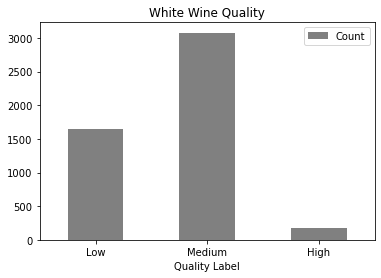

In [523]:
ax_white = df_white.plot.bar(x='Quality Label', y='Count', rot=0, color="gray", title="White Wine Quality")


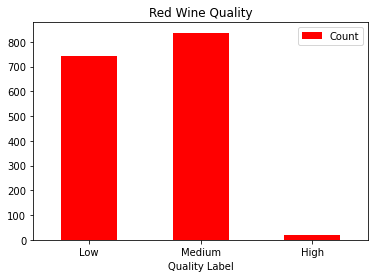

In [524]:
ax_red = df_red.plot.bar(x='Quality Label', y='Count', rot=0, color="red",title="Red Wine Quality")


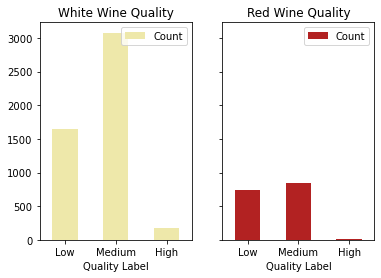

In [525]:
figure,axes = plt.subplots(1, 2,sharey="all")

ax_red = df_red.plot.bar(x='Quality Label', y='Count', rot=0, color="Firebrick",title="Red Wine Quality", ax=axes[1])
ax_white = df_white.plot.bar(x='Quality Label', y='Count', rot=0, color="PaleGoldenROd",title="White Wine Quality", ax=axes[0])

In [ ]:
# Here we are practicing slicing and comparing features

quality_features = wines[wines.columns[0:13]].groupby(["quality_label"]).quantile()
print("The quality features of wines in general\n", quality_features)

#quality_features_white = white_wine[white_wine.columns[0:13]].groupby(["quality_label"]).quantile()
#print("\nThe quality features of white wines\n", quality_features_white)

#quality_features_red = red_wine[red_wine.columns[0:13]].groupby(["quality_label"]).quantile()
#print("\nThe quality features of red wines\n", quality_features_red)

The quality features of wines in general
                fixed acidity  volatile acidity  citric acid  residual sugar  \
quality_label                                                                 
low                      7.1            0.3375        0.295            2.90   
medium                   6.9            0.2700        0.310            3.00   
high                     6.8            0.2750        0.320            4.05   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality_label                                                                  
low               0.0520                 26.0                 124.0  0.99600   
medium            0.0450                 29.0                 116.0  0.99400   
high              0.0365                 34.0                 118.5  0.99178   

                 pH  sulphates  alcohol  quality  
quality_label                                     
low            3.20       0.50      9.6      5.0  
medium  

In [ ]:
quality_features_white = white_wine[white_wine.columns[0:13]].groupby(["quality_label"]).quantile()
print("\nThe quality features of white wines\n", quality_features_white)


The quality features of white wines
                fixed acidity  volatile acidity  citric acid  residual sugar  \
quality_label                                                                 
low                      6.8              0.29         0.32           6.625   
medium                   6.8              0.25         0.32           4.800   
high                     6.8              0.26         0.32           4.300   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality_label                                                                  
low               0.0470                 34.0                 149.0  0.99514   
medium            0.0410                 33.5                 129.0  0.99305   
high              0.0355                 34.5                 122.0  0.99162   

                 pH  sulphates  alcohol  quality  
quality_label                                     
low            3.16       0.47      9.6      5.0  
medium      

In [ ]:
quality_features_red = red_wine[red_wine.columns[0:13]].groupby(["quality_label"]).quantile()
print("\nThe quality features of red wines\n", quality_features_red)


The quality features of red wines
                fixed acidity  volatile acidity  citric acid  residual sugar  \
quality_label                                                                 
low                     7.80              0.59         0.22             2.2   
medium                  8.00              0.46         0.31             2.2   
high                    8.25              0.37         0.42             2.1   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality_label                                                                   
low               0.0810                 14.0                  45.0  0.996935   
medium            0.0770                 13.0                  33.0  0.996420   
high              0.0705                  7.5                  21.5  0.994940   

                 pH  sulphates  alcohol  quality  
quality_label                                     
low            3.31       0.58     9.70      5.0  
medium   

In [ ]:
alcohol_red = pd.DataFrame(red_wine[("alcohol")])
alcohol_red = alcohol_red.describe().drop(index=["count", "std"])

alcohol_white = pd.DataFrame(white_wine[("alcohol")])
alcohol_white = alcohol_white.describe().drop(index=["count", "std"])

alcohol_white
#alcohol_red

,alcohol
mean,10.514267
min,8.000000
25%,9.500000
50%,10.400000
75%,11.400000
max,14.200000


In [ ]:
pH_red = pd.DataFrame(red_wine[("pH")])
pH_red = pH_red.describe().drop(index=["count", "std"])

pH_white = pd.DataFrame(white_wine[("pH")])
pH_white = pH_white.describe().drop(index=["count", "std"])

pH_red
#pH_white

,pH
mean,3.311113
min,2.740000
25%,3.210000
50%,3.310000
75%,3.400000
max,4.010000


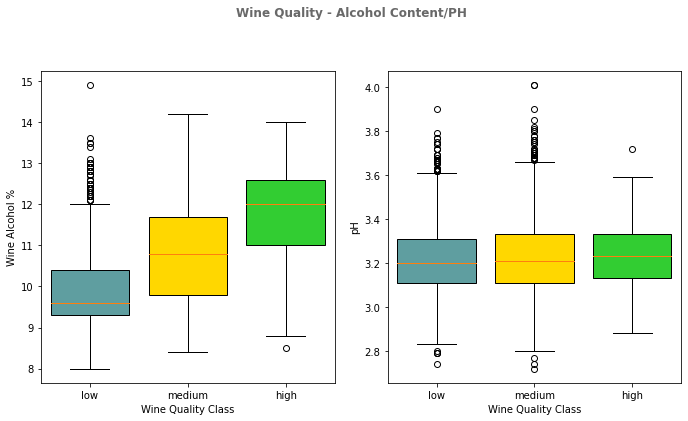

In [ ]:
# First we generate data

# here we generate data for comparing the wine qualities and the *alcohol* content
alc_vs_quality_low = wines[wines["quality_label"] == "low"]["alcohol"]
alc_vs_quality_mid = wines[wines["quality_label"] == "medium"]["alcohol"]
alc_vs_quality_high = wines[wines["quality_label"] == "high"]["alcohol"]

alc_vs_quality = (alc_vs_quality_low , alc_vs_quality_mid, alc_vs_quality_high)

# here we generate data for comparing the wine qualities and the *ph* value

ph_vs_quality_low = wines[wines["quality_label"] == "low"]["pH"]
ph_vs_quality_mid = wines[wines["quality_label"] == "medium"]["pH"]
ph_vs_quality_high = wines[wines["quality_label"] == "high"]["pH"]

ph_vs_quality = (ph_vs_quality_low, ph_vs_quality_mid, ph_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig3, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (10,6))

# now we plot
bplot1 = ax1.boxplot(alc_vs_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot2 = ax2.boxplot(ph_vs_quality, widths= 0.8, patch_artist= True, labels= labels)

#adding title
plt.suptitle("Wine Quality - Alcohol Content/PH", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig3.tight_layout(pad=3)

#adding labels for plot 1
ax1.set_xlabel("Wine Quality Class")
ax1.set_ylabel("Wine Alcohol %")

#adding labels for plot 2
ax2.set_xlabel("Wine Quality Class")
ax2.set_ylabel("pH")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()


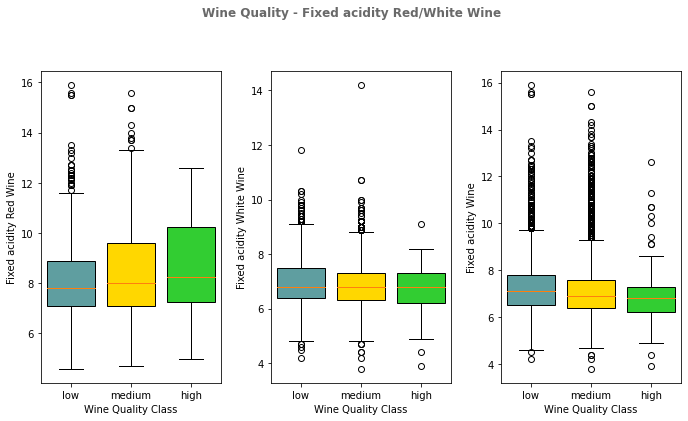

In [ ]:
# First we generate data

# here we generate data for comparing the red wine qualities and the *fixed acidity* content
red_fix_quality_low = red_wine[red_wine["quality_label"] == "low"]["fixed acidity"]
red_fix_quality_mid = red_wine[red_wine["quality_label"] == "medium"]["fixed acidity"]
red_fix_quality_high = red_wine[red_wine["quality_label"] == "high"]["fixed acidity"]

red_fix_quality = (red_fix_quality_low , red_fix_quality_mid, red_fix_quality_high)

# here we generate data for comparing the white wine qualities and the *fixed acidity* value

white_fix_quality_low = white_wine[white_wine["quality_label"] == "low"]["fixed acidity"]
white_fix_quality_mid = white_wine[white_wine["quality_label"] == "medium"]["fixed acidity"]
white_fix_quality_high = white_wine[white_wine["quality_label"] == "high"]["fixed acidity"]

white_fix_quality = (white_fix_quality_low , white_fix_quality_mid, white_fix_quality_high)

# here we generate data for comparing the wine qualities and the *fixed acidity* value

fix_vs_quality_low = wines[wines["quality_label"] == "low"]["fixed acidity"]
fix_vs_quality_mid = wines[wines["quality_label"] == "medium"]["fixed acidity"]
fix_vs_quality_high = wines[wines["quality_label"] == "high"]["fixed acidity"]

fix_vs_fix_quality = (fix_vs_quality_low , fix_vs_quality_mid, fix_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig4, (ax3, ax4, ax8) = plt.subplots(nrows= 1, ncols= 3, figsize= (10,6))

# now we plot
bplot3 = ax3.boxplot(red_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot4 = ax4.boxplot(white_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot8 = ax8.boxplot(fix_vs_fix_quality, widths= 0.8, patch_artist= True, labels= labels)

#adding title
plt.suptitle("Wine Quality - Fixed acidity Red/White Wine", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig4.tight_layout(pad=3)

#adding labels for plot 1
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("Fixed acidity Red Wine")

#adding labels for plot 2
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("Fixed acidity White Wine")

#adding labels for plot 3
ax8.set_xlabel("Wine Quality Class")
ax8.set_ylabel("Fixed acidity Wine")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot8):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()


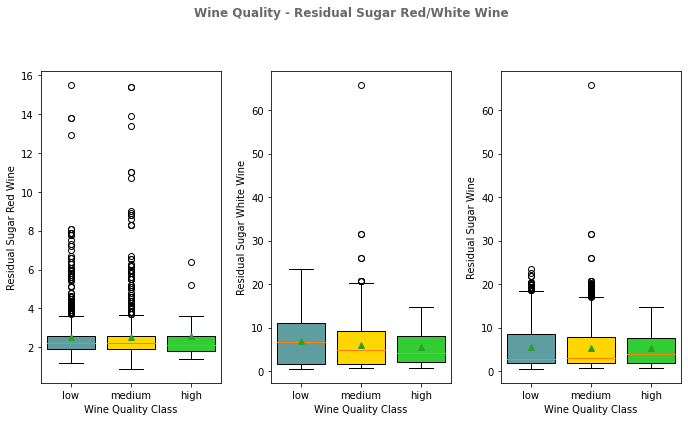

In [ ]:
# First we generate data

# here we generate data for comparing the red wine qualities and the *residual sugar* content
red_sug_quality_low = red_wine[red_wine["quality_label"] == "low"]["residual sugar"]
red_sug_quality_mid = red_wine[red_wine["quality_label"] == "medium"]["residual sugar"]
red_sug_quality_high = red_wine[red_wine["quality_label"] == "high"]["residual sugar"]

red_sug_quality = (red_sug_quality_low , red_sug_quality_mid, red_sug_quality_high)

# here we generate data for comparing the white wine qualities and the *residual sugar* value

white_sug_quality_low = white_wine[white_wine["quality_label"] == "low"]["residual sugar"]
white_sug_quality_mid = white_wine[white_wine["quality_label"] == "medium"]["residual sugar"]
white_sug_quality_high = white_wine[white_wine["quality_label"] == "high"]["residual sugar"]

white_sug_quality = (white_sug_quality_low , white_sug_quality_mid, white_sug_quality_high)

# here we generate data for comparing the wine qualities and the *fixed acidity* value

sug_vs_quality_low = wines[wines["quality_label"] == "low"]["residual sugar"]
sug_vs_quality_mid = wines[wines["quality_label"] == "medium"]["residual sugar"]
sug_vs_quality_high = wines[wines["quality_label"] == "high"]["residual sugar"]

sug_vs_sug_quality = (sug_vs_quality_low , sug_vs_quality_mid, sug_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig5, (ax5, ax6, ax8) = plt.subplots(nrows= 1, ncols= 3, figsize= (10,6))

# now we plot
bplot5 = ax5.boxplot(red_sug_quality, widths= 0.8, patch_artist= True, labels= labels, showmeans=True)
bplot6 = ax6.boxplot(white_sug_quality, widths= 0.8, patch_artist= True, labels= labels, showmeans=True)
bplot8 = ax8.boxplot(sug_vs_sug_quality, widths= 0.8, patch_artist= True, labels= labels, showmeans=True)

#adding title
plt.suptitle("Wine Quality - Residual Sugar Red/White Wine", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig5.tight_layout(pad=3)

#adding labels for plot 1
ax5.set_xlabel("Wine Quality Class")
ax5.set_ylabel("Residual Sugar Red Wine")

#adding labels for plot 2
ax6.set_xlabel("Wine Quality Class")
ax6.set_ylabel("Residual Sugar White Wine")

#adding labels for plot 3
ax8.set_xlabel("Wine Quality Class")
ax8.set_ylabel("Residual Sugar Wine")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot5, bplot6, bplot8):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()


In [ ]:
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\tCritical f Value:", scipy.stats.f.ppf(q=1-2.2715337450621843e-266, dfn=2, dfd=6494))

#The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.
#The higher the F-value, the lower the corresponding p-value.
#If the p-value is below a certain threshold (e.g. α = .05), we can reject the null hypothesis of the ANOVA and 
#conclude that there is a statistically significant difference between group means.

# The F value should always be used along with the p value in deciding whether your results are significant enough to reject the null hypothesis. 
# If you get a large f value (one that is bigger than the F critical value found in a table), it means something is significant, while a small p value means all your results are significant. 
# The F statistic just compares the joint effect of all the variables together. 
# To put it simply, reject the null hypothesis only if your alpha level is larger than your p value.

#H0 rejected, Fcrit > F, p<alpha

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266 	Critical f Value: inf


In [ ]:
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['residual sugar'],
wines[wines['quality_label'] == 'medium']['residual sugar'],
wines[wines['quality_label'] == 'high']['residual sugar'])
print('ANOVA test for mean residual sugar levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\tCritical f Value:", scipy.stats.f.ppf(q=1-.05, dfn=2, dfd=6494))

# The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.
#The higher the F-value, the lower the corresponding p-value.
#If the p-value is below a certain threshold (e.g. α = .05), we can reject the null hypothesis of the ANOVA and 
#conclude that there is a statistically significant difference between group means.

#H0 rejected, Fcrit > F, p<alpha

ANOVA test for mean residual sugar levels across wine samples with different quality ratings
F Statistic: 3.432938987382213 	p-value: 0.032350509691691995 	Critical f Value: 2.9971146530529116


In [624]:
Test = input ("ANOVA Test Komponente eingeben:")

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low'][Test],
wines[wines['quality_label'] == 'medium'][Test],
wines[wines['quality_label'] == 'high'][Test])
print('ANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\tCritical f Value:", scipy.stats.f.ppf(q=1-.05, dfn=2, dfd= len(wines['quality_label'])-3))

# The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.
#The higher the F-value, the lower the corresponding p-value.
#If the p-value is below a certain threshold (e.g. α = .05), we can reject the null hypothesis of the ANOVA and 
#conclude that there is a statistically significant difference between group means.

#H0 not rejected, Fcrit < F, p>alpha -> not significant

ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266 	Critical f Value: 2.9971146530529116


In [ ]:
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['volatile acidity'],
wines[wines['quality_label'] == 'medium']['volatile acidity'],
wines[wines['quality_label'] == 'high']['volatile acidity'])
print('ANOVA test for mean volatile acidity levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\tCritical f Value:", scipy.stats.f.ppf(q=1-.05, dfn=2, dfd=6494))

# The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.
#The higher the F-value, the lower the corresponding p-value.
#If the p-value is below a certain threshold (e.g. α = .05), we can reject the null hypothesis of the ANOVA and 
#conclude that there is a statistically significant difference between group means.

#H0 rejected, Fcrit > F, p<alpha

ANOVA test for mean volatile acidity levels across wine samples with different quality ratings
F Statistic: 250.3391447532201 	p-value: 1.8472285967281885e-105 	Critical f Value: 2.9971146530529116


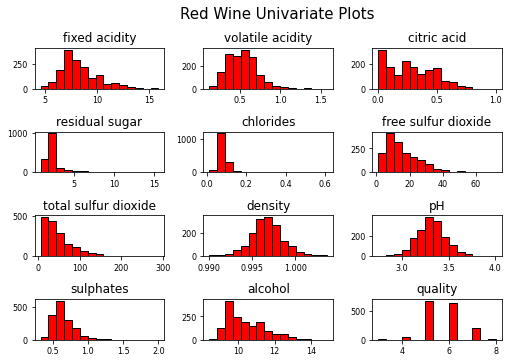

In [ ]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

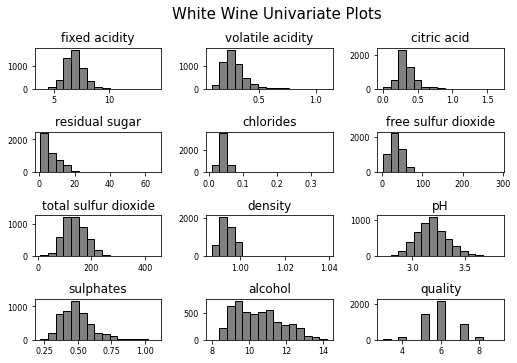

In [ ]:
white_wine.hist(bins=15, color='gray', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

#fixed acidity: red&white wine similar fixed acidity level, highest count is ~ level7
#               red wine has more levels
#volatile acidity: red wine has a higher volatile level ~0,6 highest count, outlier even ~1,4
#                  white wine level is ~0,3 highest count
#citric acid:   red&white similar citric acid level between 0-0,5
#               red highest count ~0,1, white ~0,3, red counts are more distributed in different levels
#  

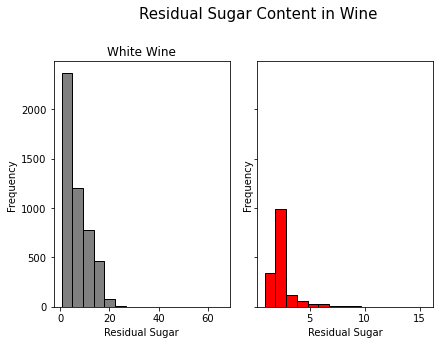

In [ ]:
#generate plots
fig8, (ax9, ax10) = plt.subplots(nrows= 1, ncols= 2, sharey=True, )

plt.tight_layout()

#get data
ax9.hist(white_wine["residual sugar"],bins=15, color='gray', edgecolor='black', linewidth=1.0)
ax10.hist(red_wine["residual sugar"],bins=15, color='red', edgecolor='black', linewidth=1.0)

#labels description
ax9.set_xlabel("Residual Sugar")
ax9.set_ylabel("Frequency")
ax9.set_title("White Wine")

ax10.set_xlabel("Residual Sugar")
ax10.set_ylabel("Frequency")
ax10.set_title("Red Wine")

plt.title('Residual Sugar Content in Wine',x=0.01, y=1.15, fontsize=15)
plt.show()


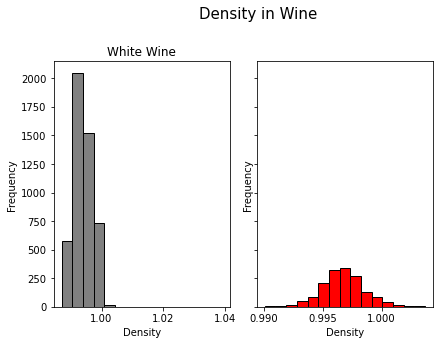

In [ ]:
fig9, (ax11, ax12) = plt.subplots(nrows= 1, ncols= 2, sharey=True, )

plt.tight_layout()

#get data
ax11.hist(white_wine["density"],bins=15, color='gray', edgecolor='black', linewidth=1.0)
ax12.hist(red_wine["density"],bins=15, color='red', edgecolor='black', linewidth=1.0)

#labels description
ax11.set_xlabel("Density")
ax11.set_ylabel("Frequency")
ax11.set_title("White Wine")

ax12.set_xlabel("Density")
ax12.set_ylabel("Frequency")
ax12.set_title("Red Wine")

plt.title('Density in Wine',x=0.01, y=1.15, fontsize=15)
plt.show()

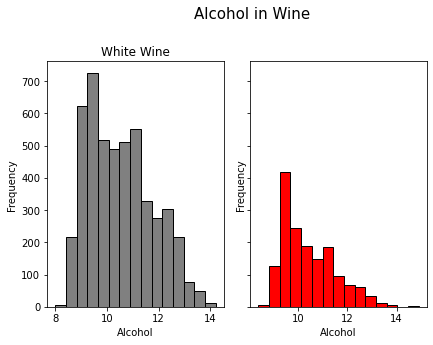

In [ ]:
fig9, (ax11, ax12) = plt.subplots(nrows= 1, ncols= 2, sharey=True, )

plt.tight_layout()

#get data
ax11.hist(white_wine["alcohol"],bins=15, color='gray', edgecolor='black', linewidth=1.0)
ax12.hist(red_wine["alcohol"],bins=15, color='red', edgecolor='black', linewidth=1.0)

#labels description
ax11.set_xlabel("Alcohol")
ax11.set_ylabel("Frequency")
ax11.set_title("White Wine")

ax12.set_xlabel("Alcohol")
ax12.set_ylabel("Frequency")
ax12.set_title("Red Wine")

plt.title('Alcohol in Wine',x=0.01, y=1.15, fontsize=15)
plt.show()

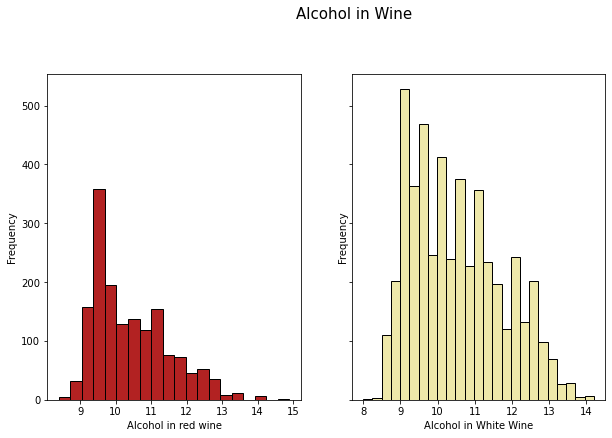

In [ ]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["alcohol"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Alcohol in red wine")
#ax1.set_title("Red Wine")

ax2.hist(white_wine["alcohol"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Alcohol in White Wine")
#ax2.set_title("White Wine")

plt.title('Alcohol in Wine',x=0.01, y=1.15, fontsize=15)

plt.show()

In [ ]:
wines.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


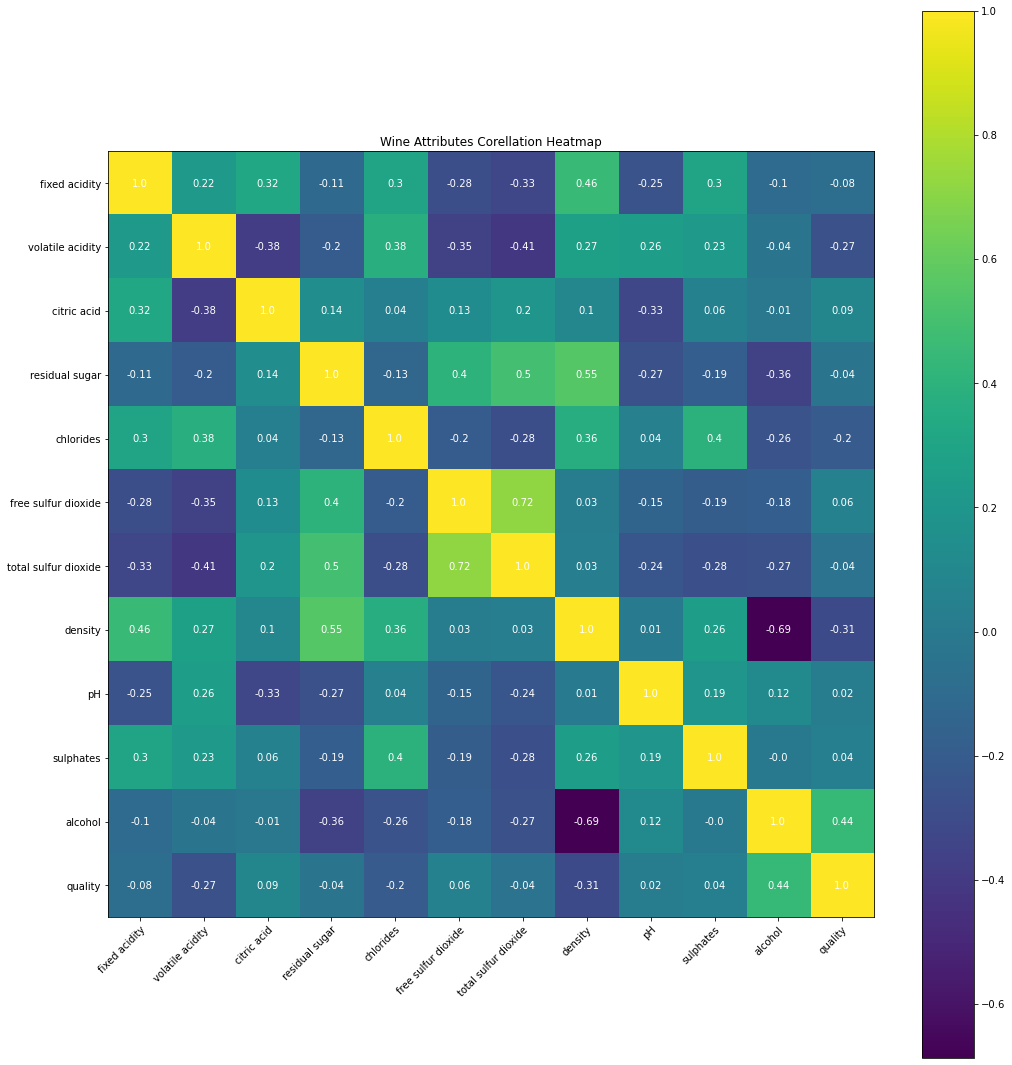

In [605]:
wine_attributes = ["fixed acidity",	"volatile acidity",	"citric acid", "residual sugar", "chlorides",	
                    "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

correlation = pd.DataFrame(wines.corr())
correlation_num = correlation.select_dtypes(include="number")
correlation_round = correlation_num.to_numpy().round(2)

fig, ax = plt.subplots(figsize= (15,15))
im = ax.imshow(correlation)


# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(wine_attributes)), labels=wine_attributes)
ax.set_yticks(np.arange(len(wine_attributes)), labels=wine_attributes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Loop over data dimensions and create text annotations.
for i in range(len(wine_attributes)):
    for j in range(len(wine_attributes)):
        text = ax.text(j, i, correlation_round[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Wine Attributes Corellation Heatmap")
fig.tight_layout()

plt.show()

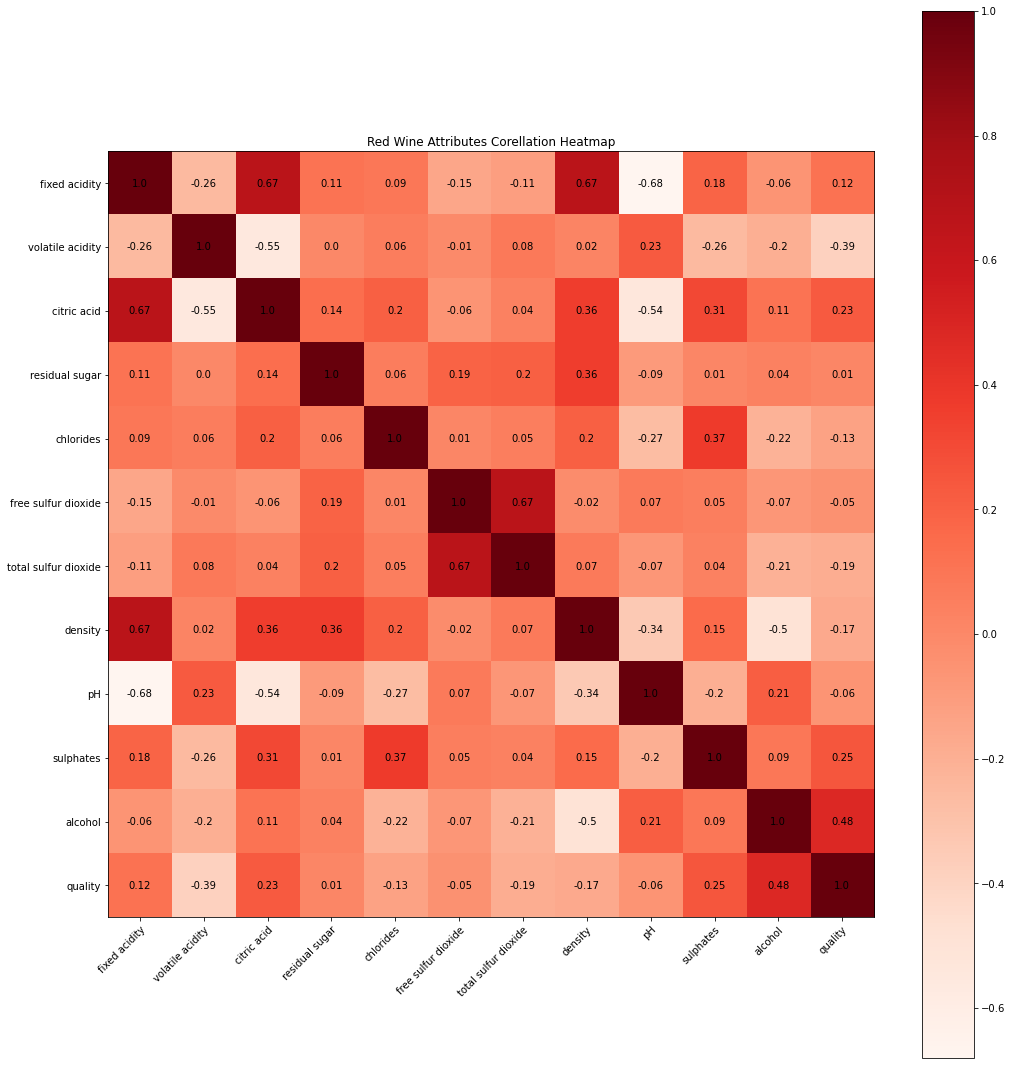

In [ ]:
wine_attributes = ["fixed acidity",	"volatile acidity",	"citric acid", "residual sugar", "chlorides",	
                    "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

correlation = pd.DataFrame(red_wine.corr()).select_dtypes(include="number").to_numpy().round(2)

fig, ax = plt.subplots(figsize= (15,15))
im = ax.imshow(correlation, cmap="Reds")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(wine_attributes)), labels=wine_attributes)
ax.set_yticks(np.arange(len(wine_attributes)), labels=wine_attributes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Loop over data dimensions and create text annotations.
for i in range(len(wine_attributes)):
    for j in range(len(wine_attributes)):
        text = ax.text(j, i, correlation[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Red Wine Attributes Corellation Heatmap")
fig.tight_layout()

plt.show()

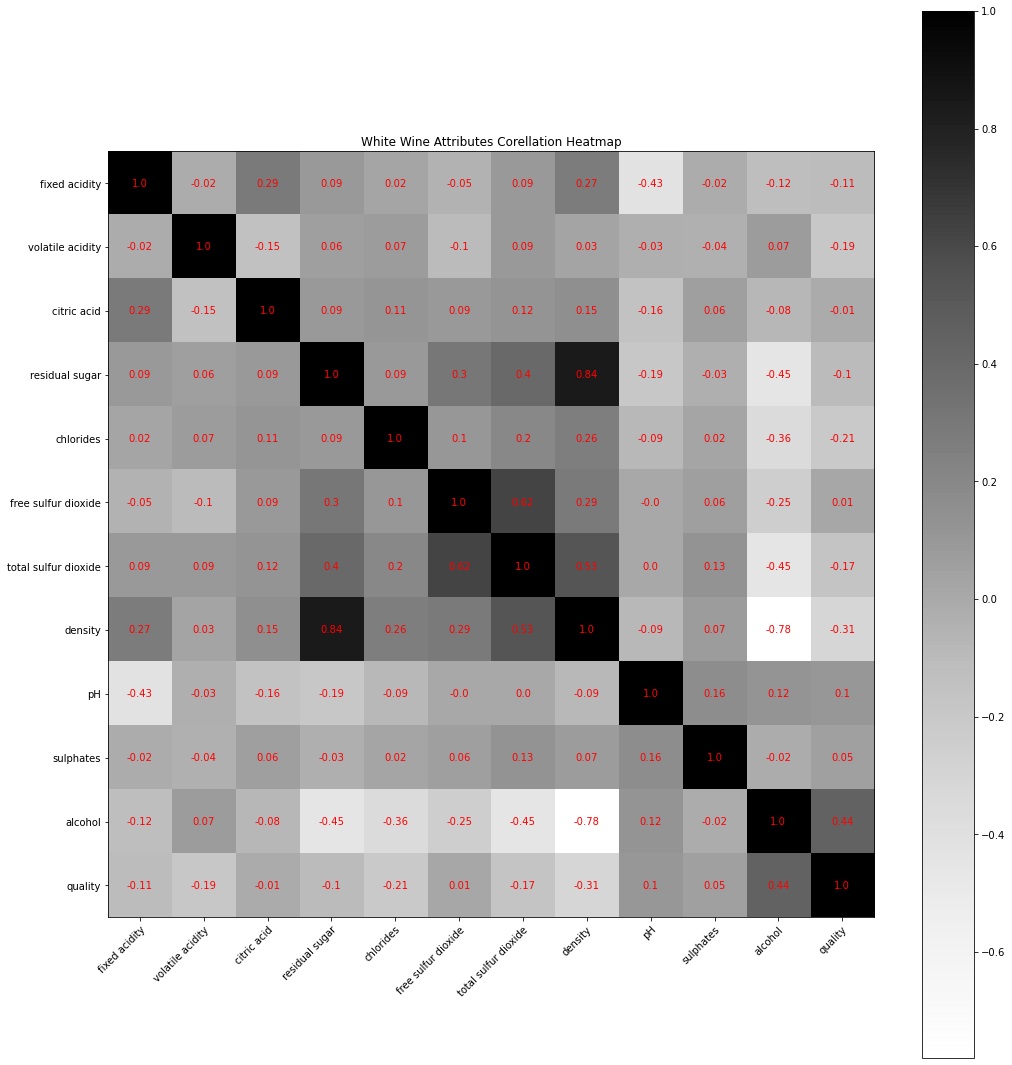

In [ ]:
wine_attributes = ["fixed acidity",	"volatile acidity",	"citric acid", "residual sugar", "chlorides",	
                    "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

correlation = pd.DataFrame(white_wine.corr())
correlation_num = correlation.select_dtypes(include="number")
correlation_round = correlation_num.to_numpy().round(2)

#correlation = pd.DataFrame(white_wine.corr()).select_dtypes(include="number").to_numpy().round(2)

fig, ax = plt.subplots(figsize= (15,15))
im = ax.imshow(correlation_round, cmap="Greys")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(wine_attributes)), labels=wine_attributes)
ax.set_yticks(np.arange(len(wine_attributes)), labels=wine_attributes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Loop over data dimensions and create text annotations.
for i in range(len(wine_attributes)):
    for j in range(len(wine_attributes)):
        text = ax.text(j, i, correlation_round[i, j],
                       ha="center", va="center", color="red")

ax.set_title("White Wine Attributes Corellation Heatmap")
fig.tight_layout()

plt.show()

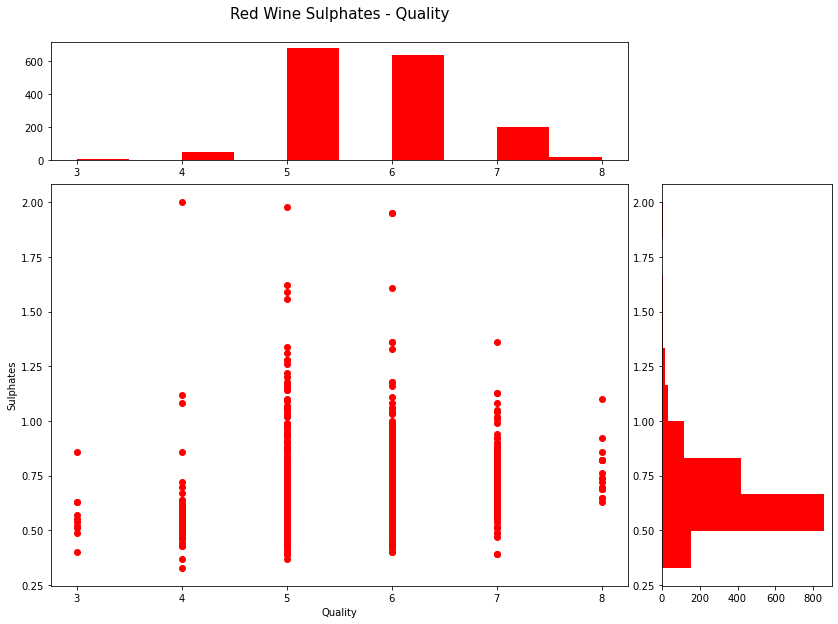

In [ ]:
#create figure & axes objects. Import GridSpec
fig_1 = plt.figure(figsize=(14,10))
gs = GridSpec(4, 4)

#3 Axes instances, by adding subplots to the figure, using GridSpec instance to position them. 
#This results in a Figure with 3 empty Axes instance
ax_scatter = fig_1.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig_1.add_subplot(gs[1:4,3])
ax_hist_x = fig_1.add_subplot(gs[0,0:3])

#plot the data
ax_scatter.scatter(red_wine['quality'], red_wine['sulphates'], color="red")

#orientation of ax_hist_y to horizontal so that it's plotted horizontally, on the right-hand side of the Scatter Plot, 
#in the same orientation we've set our axes to
ax_hist_x.hist(red_wine['quality'], color="red")
ax_hist_y.hist(red_wine['sulphates'], orientation = 'horizontal', color="red")

#labels
plt.title('Red Wine Sulphates - Quality', y=1.15, fontsize=15)
ax_scatter.set_xlabel("Quality")
ax_scatter.set_ylabel("Sulphates")

plt.show()

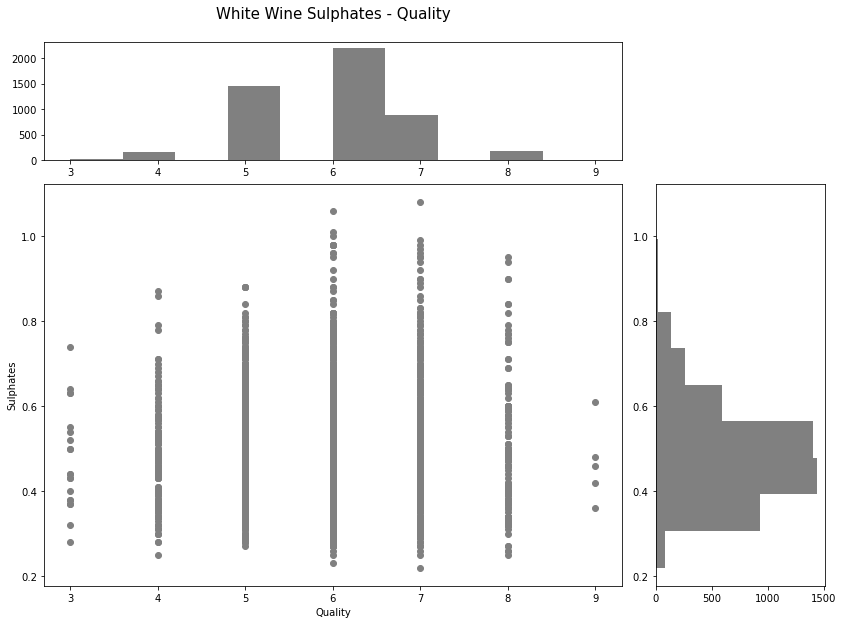

In [ ]:
#create figure & axes objects. Import GridSpec
fig_2 = plt.figure(figsize=(14,10))
gs = GridSpec(4, 4)

#3 Axes instances, by adding subplots to the figure, using GridSpec instance to position them. 
#This results in a Figure with 3 empty Axes instance
ax_scatter = fig_2.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig_2.add_subplot(gs[1:4,3])
ax_hist_x = fig_2.add_subplot(gs[0,0:3])

#plot the data
ax_scatter.scatter(white_wine['quality'], white_wine['sulphates'], color="gray")

#orientation of ax_hist_y to horizontal so that it's plotted horizontally, on the right-hand side of the Scatter Plot, 
#in the same orientation we've set our axes to
ax_hist_x.hist(white_wine['quality'], color="gray")
ax_hist_y.hist(white_wine['sulphates'], orientation = 'horizontal', color="gray")

#labels
plt.title('White Wine Sulphates - Quality', y=1.15, fontsize=15)
ax_scatter.set_xlabel("Quality")
ax_scatter.set_ylabel("Sulphates")

plt.show()

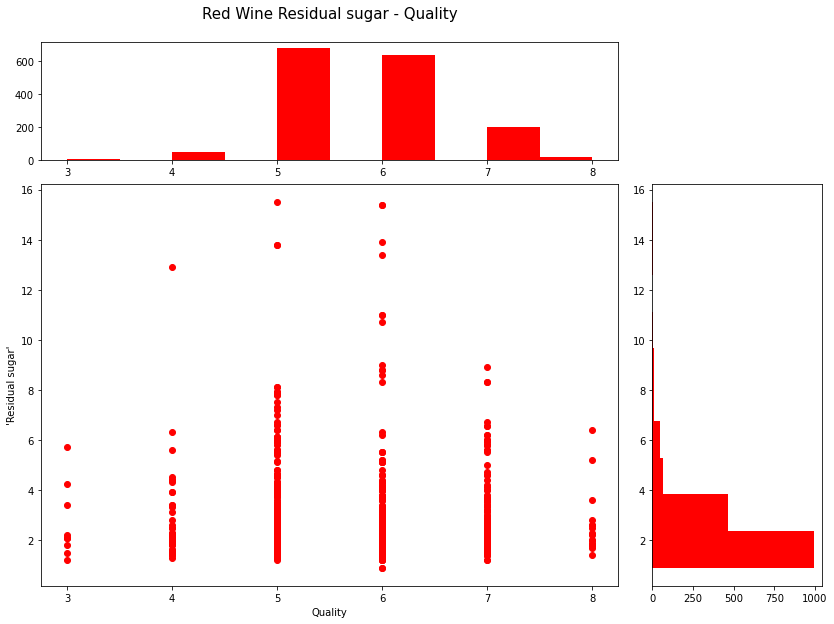

In [ ]:
#create figure & axes objects. Import GridSpec
fig_1 = plt.figure(figsize=(14,10))
gs = GridSpec(4, 4)

#3 Axes instances, by adding subplots to the figure, using GridSpec instance to position them. 
#This results in a Figure with 3 empty Axes instance
ax_scatter = fig_1.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig_1.add_subplot(gs[1:4,3])
ax_hist_x = fig_1.add_subplot(gs[0,0:3])

#plot the data
ax_scatter.scatter(red_wine['quality'], red_wine['residual sugar'], color="red")

#orientation of ax_hist_y to horizontal so that it's plotted horizontally, on the right-hand side of the Scatter Plot, 
#in the same orientation we've set our axes to
ax_hist_x.hist(red_wine['quality'], color="red")
ax_hist_y.hist(red_wine['residual sugar'], orientation = 'horizontal', color="red")

#labels
plt.title('Red Wine Residual sugar - Quality', y=1.15, fontsize=15)
ax_scatter.set_xlabel("Quality")
ax_scatter.set_ylabel("'Residual sugar'")

plt.show()

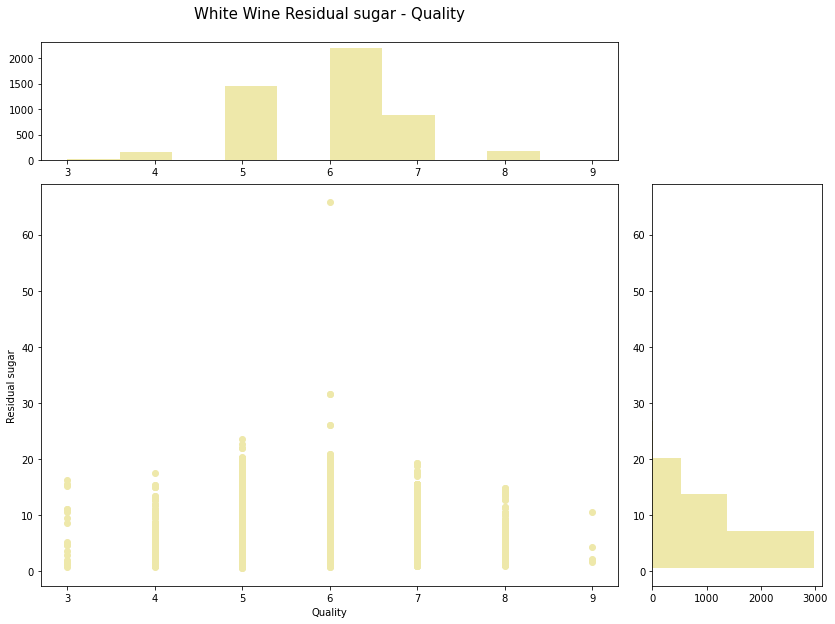

In [ ]:
#create figure & axes objects. Import GridSpec
fig_2 = plt.figure(figsize=(14,10))
gs = GridSpec(4, 4)

#3 Axes instances, by adding subplots to the figure, using GridSpec instance to position them. 
#This results in a Figure with 3 empty Axes instance
ax_scatter = fig_2.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig_2.add_subplot(gs[1:4,3])
ax_hist_x = fig_2.add_subplot(gs[0,0:3])

#plot the data
ax_scatter.scatter(white_wine['quality'], white_wine['residual sugar'], color="PaleGoldenRod")

#orientation of ax_hist_y to horizontal so that it's plotted horizontally, on the right-hand side of the Scatter Plot, 
#in the same orientation we've set our axes to
ax_hist_x.hist(white_wine['quality'], color="PaleGoldenRod")
ax_hist_y.hist(white_wine['residual sugar'], orientation = 'horizontal', color="PaleGoldenRod")

#labels
plt.title('White Wine Residual sugar - Quality', y=1.15, fontsize=15)
ax_scatter.set_xlabel("Quality")
ax_scatter.set_ylabel('Residual sugar')

plt.show()

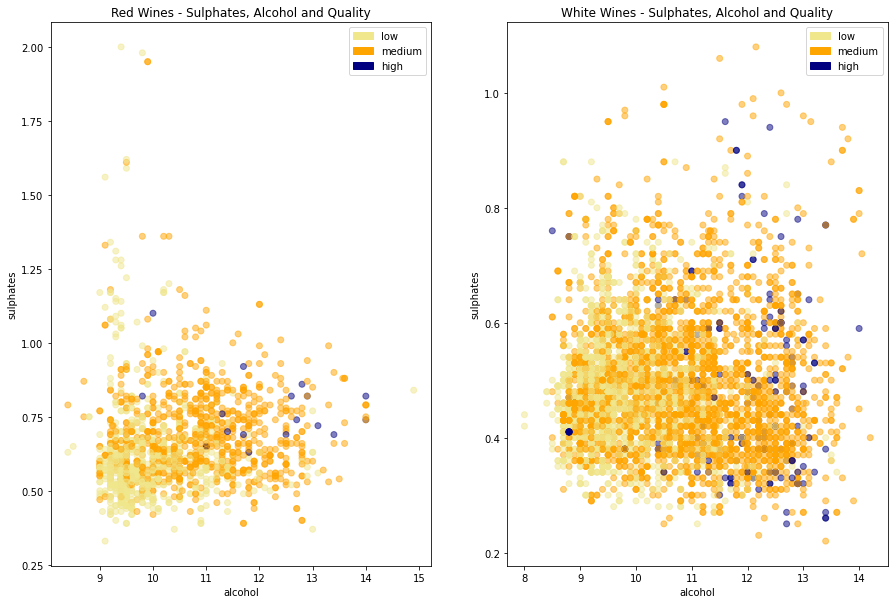

In [ ]:
colors = {"low": "khaki", "medium": "orange", "high": "navy"}

#first we define a dictionary where we associate a color to each quality_label, 
#then in the c (color) parameter of the scatterplot we map them (we associate each quality_label in the dataset with the corresponding color), 
#and for the legend we use a special matplotlib class called patches

fig, (ax_1,ax_2) = plt.subplots(figsize=(15,10), nrows= 1, ncols= 2)
# get data

scatter_red = ax_1.scatter(red_wine["alcohol"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)    

scatter_white = ax_2.scatter(white_wine["alcohol"], white_wine["sulphates"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)

#labels
ax_1.set_xlabel("alcohol", fontsize=10)
ax_1.set_ylabel("sulphates", fontsize=10)
ax_1.set_title('Red Wines - Sulphates, Alcohol and Quality')

ax_2.set_xlabel("alcohol", fontsize=10)
ax_2.set_ylabel("sulphates", fontsize=10)
ax_2.set_title('White Wines - Sulphates, Alcohol and Quality')

#legend
low_quality = mpatches.Patch(color='khaki', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax_1.legend(handles=[low_quality, medium_quality, high_quality])
ax_2.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

In [575]:
Q1w = white_wine.quantile(0.25).round(2)
Q3w = white_wine.quantile(0.75).round(2)
IQRw = Q3w - Q1w
#print(IQRw)

Q1r = red_wine.quantile(0.25).round(2)
Q3r = red_wine.quantile(0.75).round(2)
IQRr = Q3r- Q1r

Q1a = wines.quantile(0.25).round(2)
Q3a = wines.quantile(0.75).round(2)
IQRa = Q3a- Q1a

#print("\nIQR Red: \n", IQRr)
#print("\nIQR White: \n", IQRw)

wine_IQRcomp = pd.concat([IQRr,IQRw,IQRa] ,axis=1, keys= ("Red Wine IQR","White Wine IQR", "Both Wines IQR"))
wine_IQRcomp

,Red Wine IQR,White Wine IQR,Both Wines IQR
fixed acidity,2.10,1.00,1.30
volatile acidity,0.25,0.11,0.17
citric acid,0.33,0.12,0.14
residual sugar,0.70,8.20,6.30
chlorides,0.02,0.01,0.02
free sulfur dioxide,14.00,23.00,24.00
total sulfur dioxide,40.00,59.00,79.00
density,0.00,0.01,0.01
pH,0.19,0.19,0.21
sulphates,0.18,0.14,0.17


In [683]:
#((white_wine.drop(columns=["quality_label","wine_type"],  axis=1)) < (Q1w - 1.5 * IQRw)) | (white_wine.drop(columns=["quality_label","wine_type"],  axis=1) > (Q3w + 1.5 * IQRw))

In [680]:
#((red_wine.drop(columns=["quality_label","wine_type"],  axis=1)) < (Q1w - 1.5 * IQRw)) | (red_wine.drop(columns=["quality_label","wine_type"],  axis=1) > (Q3w + 1.5 * IQRw))

In [633]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white


In [632]:
#Skewness measures asymmetry in the data distribution, while kurtosis measures peakedness
#The skewness reflects the shape and distribution of the data
Eingabe = input ("Komponente eingeben")

#Eingabe = "residual sugar"

print("White Wine Skewness", str(Eingabe),":", white_wine[Eingabe].astype(float).skew())

#Kurtosis identifies outliers: data with high kurtosis (heavy-tailed data) is proof of outliers, 
#and data with low kurtosis (light-tailed data) lacks them.
print("White Wine Kurtosis", str(Eingabe),":", white_wine[Eingabe].astype(float).kurt())

#the skewness value, which explains the extent to which the data is normally distributed. 
#Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.
print ("Red Wine Skewness", str(Eingabe), ":", red_wine[Eingabe].astype(float).skew())
print("Red Wine Kurtosis", str(Eingabe), ":", red_wine[Eingabe].astype(float).kurt())



White Wine Skewness alcohol : 0.4873419932161276
White Wine Kurtosis alcohol : -0.6984253277895518
Red Wine Skewness alcohol : 0.8608288068888538
Red Wine Kurtosis alcohol : 0.2000293113417695


In [641]:
#use the ScikitLearn library, especially the sklearn.preprocessing package, 
#to transform raw features into a representation that is more suitable for ML models

#The One-Hot Encoder converts each category value into a new column and assigns a 1 or 0 (True/False) value to the corresponding column. 
#The encoder prevents the model from weighting a value improperly. To illustrate this, 
#if we have a list of wines, a wine of the category "white" will have 0 in the "red" and a 1 in the "white" category. 
#As you can see, these categories are nominal

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#We imported the make_column_transformer() function
#The function took a tuple containing the transformer we want to apply and the column to which to apply to. In this case, we wanted to use the OneHotEncoder() transformer and apply it to the 'island' column.
#We used the remainder='passthrough' parameter to specify that all other columns should be left untouched.
#We then applied the .fit_transform() method to our DataFrame.
#Finally, we reconstructed the DataFrame



transformer = make_column_transformer((OneHotEncoder(), ['wine_type']),remainder='passthrough')
transformed = transformer.fit_transform(wines)
transformed_wines = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

transformed_wines.head()

,onehotencoder__wine_type_red,onehotencoder__wine_type_white,remainder__fixed acidity,remainder__volatile acidity,remainder__citric acid,remainder__residual sugar,remainder__chlorides,remainder__free sulfur dioxide,remainder__total sulfur dioxide,remainder__density,remainder__pH,remainder__sulphates,remainder__alcohol,remainder__quality,remainder__quality_label
0,0.0,1.0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.9942,3.26,0.38,12.2,8,high
1,1.0,0.0,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.9956,3.27,0.45,9.9,5,low
2,0.0,1.0,6.8,0.39,0.34,7.4,0.02,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium
3,0.0,1.0,6.3,0.28,0.47,11.2,0.04,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium
4,0.0,1.0,7.4,0.35,0.2,13.9,0.054,63.0,229.0,0.99888,3.11,0.5,8.9,6,medium


In [638]:
# dummy variables in statistics.
#The Wine type column contain categorical values. We can convert the values in the Wine type column into one-hot encoded vectors using the get_dummies() function
x = pd.get_dummies(wines.wine_type, prefix='Wine_type')
#We passed Wine type as the value for the prefix attribute of the get_dummies() method, hence you can see the string wine type prefixed before the header of each of the one-hot encoded columns in the output.
print(x.head())

   Wine_type_red  Wine_type_white
0              0                1
1              1                0
2              0                1
3              0                1
4              0                1


In [650]:
from sklearn.preprocessing import LabelEncoder

red_wine_df = pd.DataFrame(red_wine , columns=["quality_label"])
white_wine_df = pd.DataFrame(white_wine , columns=["quality_label"])

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
red_wine_df['Red-Wine_Quality_Cat'] = labelencoder.fit_transform(red_wine_df["quality_label"])
white_wine_df['Red-Wine_Quality_Cat'] = labelencoder.fit_transform(white_wine_df["quality_label"])

#red_wine_df

wine_enc_comp = pd.concat([red_wine_df,white_wine_df],axis=1 )
wine_enc_comp

,quality_label,Red-Wine_Quality_Cat,quality_label,Red-Wine_Quality_Cat
0,low,1.0,medium,2
1,low,1.0,medium,2
2,low,1.0,medium,2
3,medium,2.0,medium,2
4,low,1.0,medium,2
...,...,...,...,...
4893,NaN,NaN,medium,2
4894,NaN,NaN,low,1
4895,NaN,NaN,medium,2
4896,NaN,NaN,medium,2


In [649]:
red_wine_df = pd.DataFrame(red_wine , columns=["quality_label"])
white_wine_df = pd.DataFrame(white_wine , columns=["quality_label"])

# generate binary values using get_dummies
dum_red_df = pd.get_dummies(red_wine_df, columns=["quality_label"], prefix=["Red_Quality"] )
dum_white_df = pd.get_dummies(white_wine_df, columns=["quality_label"], prefix=["White_Quality"] )
# merge with main df bridge_df on key values
red_wine_df = red_wine_df.join(dum_red_df)
white_wine_df = white_wine_df.join(dum_white_df)

#white_wine_df

wine_dum_comp = pd.concat([red_wine_df,white_wine_df],axis=1 )
wine_dum_comp

,quality_label,Red_Quality_low,Red_Quality_medium,Red_Quality_high,quality_label,White_Quality_low,White_Quality_medium,White_Quality_high
0,low,1.0,0.0,0.0,medium,0,1,0
1,low,1.0,0.0,0.0,medium,0,1,0
2,low,1.0,0.0,0.0,medium,0,1,0
3,medium,0.0,1.0,0.0,medium,0,1,0
4,low,1.0,0.0,0.0,medium,0,1,0
...,...,...,...,...,...,...,...,...
4893,NaN,NaN,NaN,NaN,medium,0,1,0
4894,NaN,NaN,NaN,NaN,low,1,0,0
4895,NaN,NaN,NaN,NaN,medium,0,1,0
4896,NaN,NaN,NaN,NaN,medium,0,1,0


In [690]:
#splitting our data set into a train and a test group
#The purpose of this split is to use a portion of the data to create the model (train), while the other part is to check the model's performance (test)

from sklearn.model_selection import train_test_split

X = wines    #X = df --> the features we will keep to build our model
y = X.wine_type    #y target --> what you're trying to predict

#X.drop(["wine_type"],axis=1,inplace=True)   # delete target column
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80,test_size=0.20)

#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print("X_test: ", X_test)
#print ("y_test: ", y_test)

AttributeError: 'DataFrame' object has no attribute 'wine_type'

In [686]:
Xred = red_wine    #X = df --> the features we will keep to build our model
yred = Xred.quality_label    #y target --> what you're trying to predict

Xred.drop(["quality_label", "quality"],axis=1,inplace=True)   # delete target column
print(red_wine)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80,test_size=0.20)

AttributeError: 'DataFrame' object has no attribute 'quality_label'

In [688]:
print(wines)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.17         0.74           12.80      0.045   
1               7.7              0.64         0.21            2.20      0.077   
2               6.8              0.39         0.34            7.40      0.020   
3               6.3              0.28         0.47           11.20      0.040   
4               7.4              0.35         0.20           13.90      0.054   
...             ...               ...          ...             ...        ...   
6492            7.6              0.32         0.58           16.75      0.050   
6493            5.6              0.28         0.27            3.90      0.043   
6494            6.4              0.37         0.20            5.60      0.117   
6495            6.5              0.26         0.50            8.00      0.051   
6496            7.2              0.62         0.06            2.70      0.077   

      free sulfur dioxide  